In [32]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
host = 'https://api.census.gov/data'
year = '2010'
dataset = 'dec/sf1'
base_url = '/'.join([host,year,dataset])
predicates = {}
get_vars = ["NAME", "P013001", "P037001"]
predicates['get'] = ",".join(get_vars)
predicates['for'] = 'state:*'

In [26]:
#executing the request to the census api
r = requests.get(base_url,params = predicates)

In [28]:
#creating a dataframe
col_names = ['name','median_age','avg_family_size','state']
state = pd.DataFrame(columns = col_names, data = r.json()[1:])

In [29]:
#visualizing the dataframe
state.head()

,name,median_age,avg_family_size,state
0,Alabama,37.9,3.02,01
1,Alaska,33.8,3.21,02
2,Arizona,35.9,3.19,04
3,Arkansas,37.4,3.00,05
4,California,35.2,3.45,06


In [30]:
#converting the types of the columns
state['median_age'] = state['median_age'].astype(float)
state['avg_family_size'] = state['avg_family_size'].astype(float)

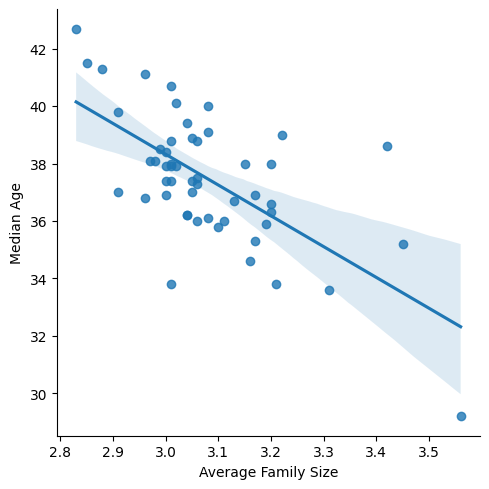

In [38]:
#creating a simple scatter plot with a regression line
s = sns.lmplot(x = 'avg_family_size',y = 'median_age', data = state)
s.set(xlabel = 'Average Family Size', ylabel = 'Median Age')
plt.show()